# Chapter 3: Machine Learning Foundations and Feature Engineering for Trading

## 1. Core ML Algorithms Adapted for Financial Markets

Financial data presents unique challenges for traditional machine learning algorithms due to its noisy, non-stationary, and often serially correlated nature. This section explores how core ML models are adapted to navigate these complexities.

### Key Adaptations:
*   **Handling Non-Stationarity:** Financial time series data often has statistical properties (like mean and variance) that change over time. Algorithms must be adapted to account for this, often through techniques like differencing, rolling windows, or using models that can handle regime changes.
*   **Signal-to-Noise Ratio:** The underlying signals in financial markets are often weak and buried in a large amount of random noise. ML models need to be robust enough to avoid fitting to this noise (overfitting).
*   **Feature Engineering:** Raw price data is rarely sufficient. Domain-specific feature engineering is crucial to extract meaningful signals for the models to learn from.

### Common Algorithms:
*   **Supervised Learning:**
    *   **Linear Models (e.g., Ridge, Lasso):** Used for predicting returns or price movements. Regularization is key to prevent overfitting.
    *   **Tree-Based Models (e.g., Decision Trees, Random Forests, Gradient Boosting):** Popular for their ability to capture non-linear relationships and interactions between features.
*   **Unsupervised Learning:**
    *   **Clustering (e.g., K-Means, DBSCAN):** Used to identify market regimes, group similar assets, or detect anomalies in trading patterns.


In [1]:
# Example: Training a Random Forest Classifier for a trading signal
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic financial data
np.random.seed(42)
data = pd.DataFrame({
    'feature1': np.random.rand(100) - 0.5,
    'feature2': np.random.rand(100) - 0.5,
    'returns': np.random.randn(100) / 100
})
# Create a binary target variable: 1 if return is positive, 0 otherwise
data['target'] = np.where(data['returns'].shift(-1) > 0, 1, 0)
data = data.dropna()

X = data[['feature1', 'feature2']]
y = data['target']

# Split data (ensure shuffle=False for time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy:.2f}')

# Example: Training a Random Forest Classifier for a trading signal
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic financial data
np.random.seed(42)
data = pd.DataFrame({
    'feature1': np.random.rand(100) - 0.5,
    'feature2': np.random.rand(100) - 0.5,
    'returns': np.random.randn(100) / 100
})
# Create a binary target variable: 1 if return is positive, 0 otherwise
data['target'] = np.where(data['returns'].shift(-1) > 0, 1, 0)
data = data.dropna()

X = data[['feature1', 'feature2']]
y = data['target']

# Split data (ensure shuffle=False for time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy:.2f}')



Model Accuracy: 0.50
Model Accuracy: 0.50


## 2. Financial Feature Engineering: Technical Indicators, Statistical Features, Cross-Asset Signals

Feature engineering is the art and science of creating informative input variables (features) from raw data. In finance, this process is critical for building successful trading models. It transforms noisy price and volume data into signals that can be more easily interpreted by ML algorithms.

### Categories of Financial Features:
*   **Technical Indicators:** These are heuristic-based features derived from price, volume, and open interest data.
    *   **Trend Indicators:** Moving Averages (SMA, EMA), MACD
    *   **Momentum Indicators:** Relative Strength Index (RSI), Stochastic Oscillator
    *   **Volatility Indicators:** Bollinger Bands, Average True Range (ATR)
*   **Statistical Features:** These are derived from the statistical properties of the data.
    *   **Rolling Statistics:** Rolling mean, standard deviation, skewness, kurtosis.
    *   **Fractional Differentiation:** A technique to achieve stationarity while preserving memory in the time series.
*   **Cross-Asset Signals:** These features capture relationships between different assets.
    *   **Correlations and Cointegration:** Measuring how assets move in relation to each other.
    *   **Spreads:** The price difference between two related assets (e.g., futures contracts with different expiry dates).
*   **Alternative Data:** Features can also be derived from non-traditional data sources like news sentiment, social media activity, or satellite imagery.

In [2]:
# Example: Calculating more technical indicators
import pandas as pd

# Sample data
prices = pd.Series([100, 102, 101, 103, 105, 107, 108, 107, 109, 110, 112, 113, 115, 116, 114, 112, 110, 111, 113, 115])

def bollinger_bands(series, window=14):
    """Calculates Bollinger Bands."""
    sma = series.rolling(window=window).mean()
    std = series.rolling(window=window).std()
    upper_band = sma + (std * 2)
    lower_band = sma - (std * 2)
    return upper_band, lower_band

def macd(series, slow=26, fast=12, signal=9):
    """Calculates Moving Average Convergence Divergence."""
    ema_fast = series.ewm(span=fast, adjust=False).mean()
    ema_slow = series.ewm(span=slow, adjust=False).mean()
    macd_line = ema_fast - ema_slow
    signal_line = macd_line.ewm(span=signal, adjust=False).mean()
    return macd_line, signal_line

# Calculate features
upper_band, lower_band = bollinger_bands(prices)
macd_line, signal_line = macd(prices)

# Create a DataFrame
features_df = pd.DataFrame({
    'Price': prices,
    'Upper_Band': upper_band,
    'Lower_Band': lower_band,
    'MACD': macd_line,
    'Signal_Line': signal_line
})

print(features_df.tail())


    Price  Upper_Band  Lower_Band      MACD  Signal_Line
15    112  118.499719  100.357424  3.583584     2.872026
16    110  117.736104  102.406753  3.267006     2.951022
17    111  117.140532  104.145182  3.061516     2.973121
18    113  116.934887  105.493685  3.025175     2.983532
19    115  117.286963  106.284466  3.121772     3.011180


## 3. Time Series Analysis Fundamentals: Stationarity, Seasonality, Trend Decomposition

Feature engineering is the art and science of creating informative input variables (features) from raw data. In finance, this process is critical for building successful trading models. It transforms noisy price and volume data into signals that can be more easily interpreted by ML algorithms.

### Categories of Financial Features:
*   **Technical Indicators:** These are heuristic-based features derived from price, volume, and open interest data.
    *   **Trend Indicators:** Moving Averages (SMA, EMA), MACD
    *   **Momentum Indicators:** Relative Strength Index (RSI), Stochastic Oscillator
    *   **Volatility Indicators:** Bollinger Bands, Average True Range (ATR)
*   **Statistical Features:** These are derived from the statistical properties of the data.
    *   **Rolling Statistics:** Rolling mean, standard deviation, skewness, kurtosis.
    *   **Fractional Differentiation:** A technique to achieve stationarity while preserving memory in the time series.
*   **Cross-Asset Signals:** These features capture relationships between different assets.
    *   **Correlations and Cointegration:** Measuring how assets move in relation to each other.
    *   **Spreads:** The price difference between two related assets (e.g., futures contracts with different expiry dates).
*   **Alternative Data:** Features can also be derived from non-traditional data sources like news sentiment, social media activity, or satellite imagery.

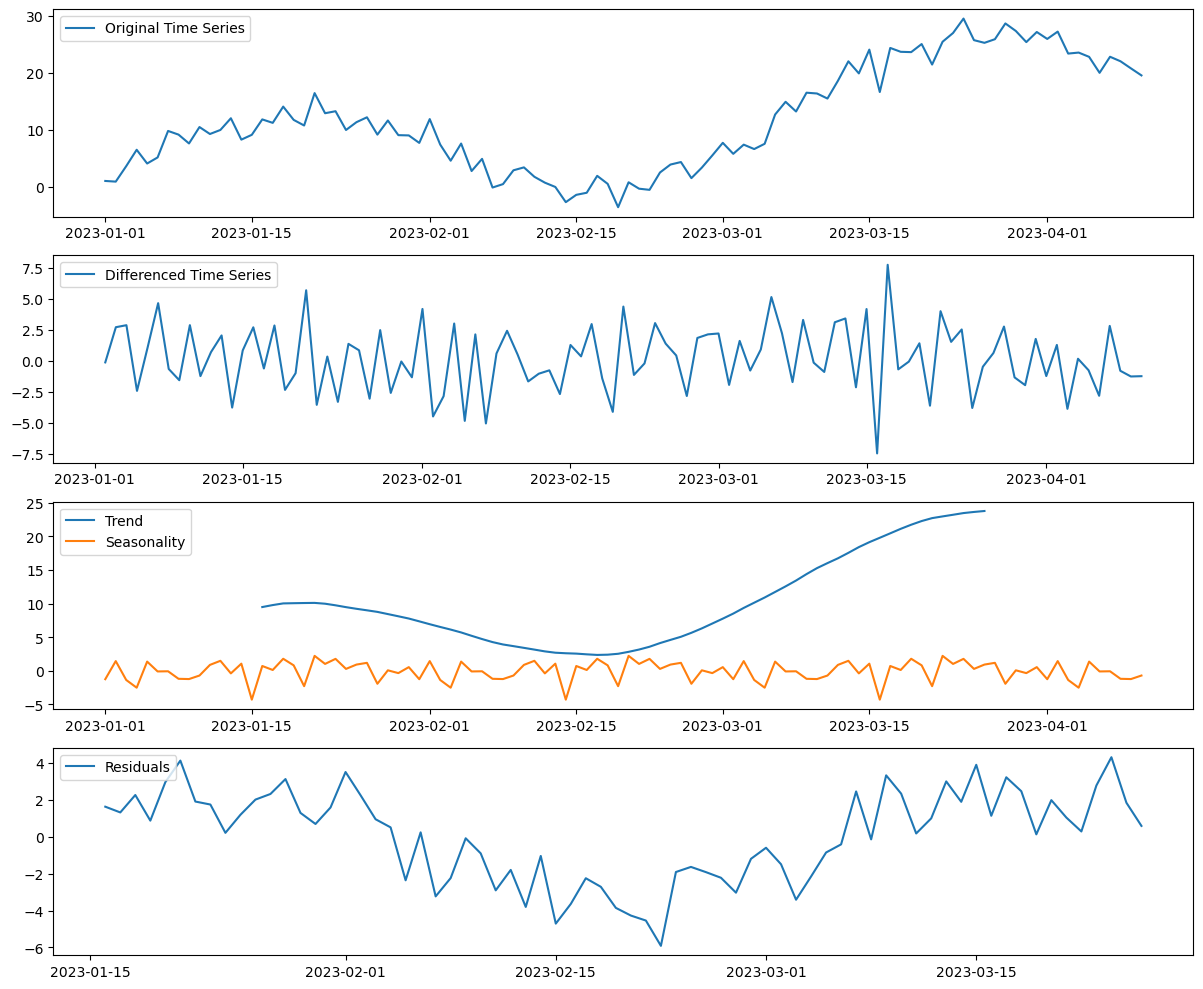

Original Series Head:
2023-01-01    0.993428
2023-01-02    0.876052
2023-01-03    3.591930
2023-01-04    6.469446
2023-01-05    4.056399
Freq: D, dtype: float64
\nDifferenced Series Head:
2023-01-02   -0.117376
2023-01-03    2.715878
2023-01-04    2.877516
2023-01-05   -2.413047
2023-01-06    1.067694
Freq: D, dtype: float64


In [3]:
# Example: Differencing and Decomposition
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Create a synthetic time series with trend and seasonality
np.random.seed(42)
time = pd.date_range(start='2023-01-01', periods=100, freq='D')
trend = np.linspace(0, 20, 100)
seasonality = 10 * np.sin(np.linspace(0, 3 * np.pi, 100))
noise = np.random.normal(0, 2, 100)
ts = pd.Series(trend + seasonality + noise, index=time)

# 1. Differencing to remove trend
ts_diff = ts.diff().dropna()

# 2. Decomposition
# Note: seasonal_decompose requires a specified period
decomposition = seasonal_decompose(ts, model='additive', period=30)

# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(ts, label='Original Time Series')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(ts_diff, label='Differenced Time Series')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.trend, label='Trend')
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

print("Original Series Head:")
print(ts.head())
print("\\nDifferenced Series Head:")
print(ts_diff.head())

## 4. Avoiding Overfitting and Look-Ahead Bias in Financial Data

Overfitting and look-ahead bias are two of the most significant pitfalls in developing trading strategies. They can lead to models that perform exceptionally well in backtests but fail miserably in live trading.

### Key Challenges:
*   **Overfitting:** This occurs when a model learns the noise in the training data instead of the underlying signal. The model becomes too complex and tailored to the specific data it was trained on, losing its ability to generalize to new, unseen data.
    *   **Causes:** Too many features, overly complex models, insufficient training data.
    *   **Mitigation:** Regularization, cross-validation, simplifying the model.
*   **Look-Ahead Bias:** This occurs when the model is trained or evaluated using information that would not have been available at the time of the decision.
    *   **Example:** Using the closing price of a day to make a trading decision at the beginning of that day.
    *   **Mitigation:** Careful construction of training and testing datasets, ensuring that only past information is used to predict future outcomes. Walk-forward validation is a key technique to avoid this.
*   **Data Leakage:** A broader category that includes look-ahead bias, where information from outside the training set leaks into the training process.

In [13]:
# Example: Generating splits for Walk-Forward Validation
import numpy as np

def walk_forward_split(data_length, n_train, n_test):
    """
    Generator function for walk-forward validation splits.
    
    Args:
    - data_length (int): Total number of samples.
    - n_train (int): Size of the training set.
    - n_test (int): Size of the test set.
    """
    i = 0
    while i + n_train + n_test <= data_length:
        train_end = i + n_train
        test_end = train_end + n_test
        
        train_indices = np.arange(i, train_end)
        test_indices = np.arange(train_end, test_end)
        
        print(f"Split: Train={train_indices[0]}-{train_indices[-1]}, Test={test_indices[0]}-{test_indices[-1]}")
        yield train_indices, test_indices
        
        i += n_test # Move the window forward by the test size

# Demonstrate the splits
data = np.random.rand(100) # 100 days of data
train_size = 20
test_size = 5

for train_idx, test_idx in walk_forward_split(len(data), train_size, test_size):
    # In a real scenario, you would train your model on data[train_idx]
    # and test it on data[test_idx]
    pass

Split: Train=0-19, Test=20-24
Split: Train=5-24, Test=25-29
Split: Train=10-29, Test=30-34
Split: Train=15-34, Test=35-39
Split: Train=20-39, Test=40-44
Split: Train=25-44, Test=45-49
Split: Train=30-49, Test=50-54
Split: Train=35-54, Test=55-59
Split: Train=40-59, Test=60-64
Split: Train=45-64, Test=65-69
Split: Train=50-69, Test=70-74
Split: Train=55-74, Test=75-79
Split: Train=60-79, Test=80-84
Split: Train=65-84, Test=85-89
Split: Train=70-89, Test=90-94
Split: Train=75-94, Test=95-99


## 5. Cross-Validation Strategies: Walk-Forward, Purged Cross-Validation, Combinatorial Purged CV

Standard cross-validation techniques (like k-fold) are often inappropriate for financial time series because they ignore the temporal order of the data. Specialized cross-validation methods are required.

### Time-Series Aware Cross-Validation:
*   **Walk-Forward Validation (Anchored and Unanchored):**
    *   **Process:** The model is trained on a window of past data and tested on the subsequent period. This window is then rolled forward in time, simulating how a model would be retrained and used in a real-world trading environment.
    *   **Benefit:** Provides a more realistic estimate of how a strategy would have performed historically.
*   **Purged Cross-Validation:**
    *   **Problem:** In financial data, the labels are often derived from information that overlaps in time. For example, a label for time `t` might be based on prices from `t` to `t+h`. This can cause data leakage between the training and test sets.
    *   **Solution:** "Purging" the training data of any observations whose labels are influenced by information in the test set.
*   **Combinatorial Purged Cross-Validation (CPCV):**
    *   **Enhancement:** An even more rigorous method that tests all possible combinations of training and testing splits, while still incorporating purging to prevent data leakage. This helps to reduce the path-dependency of a single walk-forward backtest.

In [10]:
# Example: Walk-Forward Cross-Validation Simulation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Generate synthetic data
np.random.seed(42)
X = pd.DataFrame(np.random.rand(100, 2), columns=['feature1', 'feature2'])
y = pd.Series(np.random.randint(0, 2, 100))

train_size = 60
test_size = 10
scores = []

# Use the walk_forward_split generator from the previous example
for train_indices, test_indices in walk_forward_split(len(X), train_size, test_size):
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    score = accuracy_score(y_test, predictions)
    scores.append(score)
    
    print(f"Fold Score: {score:.2f}\\n")

print(f"Average Walk-Forward Accuracy: {np.mean(scores):.2f}")


Split: Train=0-59, Test=60-69
Fold Score: 0.50\n
Split: Train=10-69, Test=70-79
Fold Score: 0.40\n
Split: Train=20-79, Test=80-89
Fold Score: 0.40\n
Split: Train=30-89, Test=90-99
Fold Score: 0.40\n
Average Walk-Forward Accuracy: 0.43


## 6. Model Selection and Hyperparameter Optimization for Trading Systems

Choosing the right model and tuning its hyperparameters are critical steps for maximizing performance and ensuring robustness.

### Hyperparameter Optimization Techniques:
*   **Grid Search:**
    *   **Process:** Exhaustively searches through a manually specified subset of the hyperparameter space of a model.
    *   **Pros:** Simple to implement.
    *   **Cons:** Can be computationally very expensive and may miss optimal parameter settings if the grid is too coarse.
*   **Random Search:**
    *   **Process:** Samples a fixed number of hyperparameter settings from specified distributions.
    *   **Pros:** More efficient than grid search, often finding better models in less time.
    *   **Cons:** The search is not guided, so it may spend time evaluating unpromising areas of the parameter space.
*   **Bayesian Optimization:**
    *   **Process:** A "smart" optimization technique that uses the results from previous evaluations to inform which hyperparameter settings to try next. It builds a probabilistic model of the objective function (e.g., Sharpe ratio) and uses it to select the most promising parameters to evaluate.
    *   **Pros:** More efficient than grid or random search, especially for expensive-to-evaluate models.
    *   **Cons:** More complex to implement.

In [11]:
# Example: GridSearchCV with TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Generate synthetic data
np.random.seed(42)
X = pd.DataFrame(np.random.rand(100, 3), columns=['f1', 'f2', 'f3'])
y = pd.Series(np.random.randint(0, 2, 100))

# Define the model and parameter grid
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10],
    'min_samples_leaf': [3, 5]
}

# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, n_jobs=-1, verbose=1)
grid_search.fit(X, y)

print("\\nBest Parameters Found:")
print(grid_search.best_params_)

print(f"\\nBest Cross-Validation Score: {grid_search.best_score_:.2f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
\nBest Parameters Found:
{'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 50}
\nBest Cross-Validation Score: 0.40


## 7. Trading-Specific Model Evaluation: Information Coefficient, Hit Ratio, Profit Factor

Standard classification and regression metrics (like accuracy or MSE) are often insufficient for evaluating trading models. We need metrics that directly relate to profitability and risk.

### Key Performance Metrics for Trading:
*   **Information Coefficient (IC):**
    *   **Definition:** Measures the correlation between a model's predictions and the actual subsequent returns.
    *   **Interpretation:** A higher IC indicates better predictive power. It is a measure of the quality of the signal, independent of the trading rules.
*   **Hit Ratio (or Win Rate):**
    *   **Definition:** The percentage of trades that are profitable.
    *   **Interpretation:** A simple measure of how often the model is "right." A hit ratio above 50% is necessary but not sufficient for profitability (the magnitude of wins vs. losses also matters).
*   **Profit Factor:**
    *   **Definition:** The ratio of gross profits to gross losses.
    *   **Interpretation:** A value greater than 1 indicates a profitable system. A higher profit factor is generally better.
*   **Sharpe Ratio:**
    *   **Definition:** Measures the risk-adjusted return of a strategy. It is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    *   **Interpretation:** The most widely used metric for comparing the performance of different trading strategies.

In [12]:
# Example: Calculating trading-specific evaluation metrics
import numpy as np
import pandas as pd

def calculate_profit_factor(returns):
    """Calculates the profit factor from a series of returns."""
    gross_profits = np.sum(returns[returns > 0])
    gross_losses = np.abs(np.sum(returns[returns < 0]))
    
    if gross_losses == 0:
        return np.inf # Avoid division by zero if there are no losses
        
    return gross_profits / gross_losses

def calculate_hit_ratio(returns):
    """Calculates the hit ratio (win rate) from a series of returns."""
    positive_returns = np.sum(returns > 0)
    total_trades = len(returns)
    
    if total_trades == 0:
        return 0.0
        
    return positive_returns / total_trades

# Simulate a series of trade returns (e.g., in percentage)
trade_returns = pd.Series([0.5, -0.2, 1.1, 0.8, -0.4, -0.1, 2.5, -1.0, 0.3, 0.9])

# Calculate metrics
profit_factor = calculate_profit_factor(trade_returns)
hit_ratio = calculate_hit_ratio(trade_returns)

print(f"Simulated Trade Returns:\\n{trade_returns.values}")
print(f"\\nProfit Factor: {profit_factor:.2f}")
print(f"Hit Ratio: {hit_ratio:.2f}")


Simulated Trade Returns:\n[ 0.5 -0.2  1.1  0.8 -0.4 -0.1  2.5 -1.   0.3  0.9]
\nProfit Factor: 3.59
Hit Ratio: 0.60


# Summary

Chapter 3 introduces machine learning foundations tailored to financial data, feature engineering, rigorous evaluation frameworks, and practical code for technical indicators and stationarity testing.